In [52]:
# San Francisco Housing Rental Analysis
# Answers

In [53]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from dotenv import load_dotenv
import plotly.express as px
from pathlib import Path
from panel.interact import interact

%matplotlib inline

In [54]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
type(mapbox_token)

str

In [55]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [56]:
# Answer 1- Housing Units Per Year 
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units= sfo_data.groupby('year').mean()

housing_units = housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)
housing_units

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


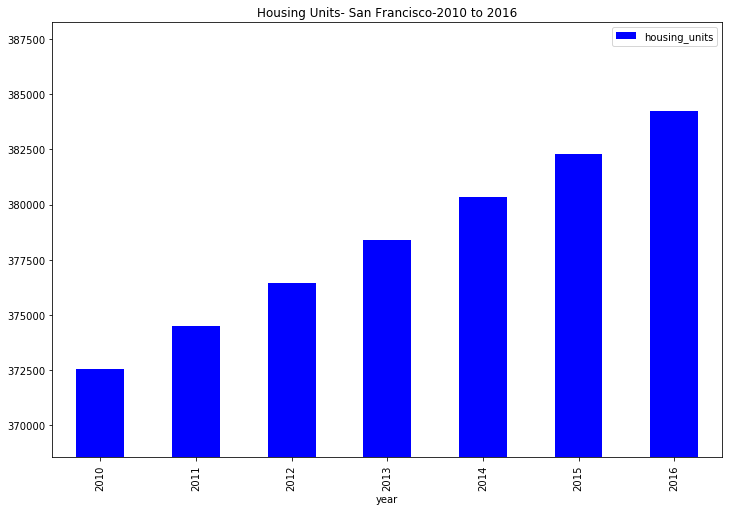

In [57]:
# Plot function for the average housing units per year
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
min = housing_units.min()['housing_units']
max = housing_units.max()['housing_units']
housing_units.plot.bar(ylim =(min-4000, max+4000),title="Housing Units- San Francisco-2010 to 2016",figsize=(12,8), color = 'blue')

plt.show()



In [58]:
# Answer 2: Average Sales Price/ sft and Avg Gross Rent in San Francisco per year

avg_price_sf = pd.DataFrame(sfo_data.groupby(['year']).mean()['sale_price_sqr_foot'])
avg_gross_rent = pd.DataFrame(sfo_data.groupby(['year']).mean()['gross_rent'])
combined_data = pd.concat([avg_price_sf, avg_gross_rent], axis=1, join="inner")
combined_data.columns = ['Avg Sale Price/sft', 'Avg Gross Rent']
combined_data

,Avg Sale Price/sft,Avg Gross Rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


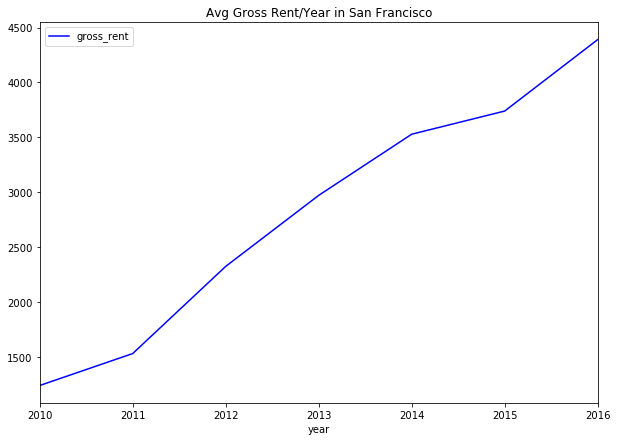

In [59]:
# Answer 3- Visualize the average gross rent and average sales price/sft per year as a line chart

avg_gross_rent.plot.line(title="Avg Gross Rent/Year in San Francisco",figsize=(10,7), color = 'blue')

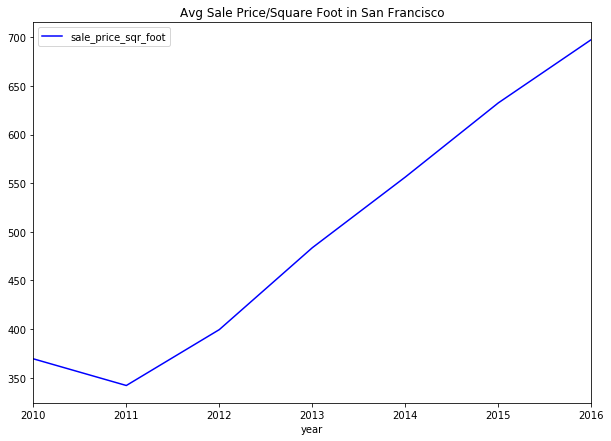

In [60]:
# Plot the Average Sales Price per Year as a line chart
avg_price_sf.plot.line(title="Avg Sale Price/Square Foot in San Francisco",figsize=(10,7), color = 'blue')

In [61]:
# Answer 4: Average Prices By Neighborhood
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_prices = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
avg_prices.reset_index(inplace=True)
avg_prices= avg_prices.drop(['housing_units', 'gross_rent'], axis=1)
avg_prices.head()


,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [62]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def select_neighborhood(neighborhood):

    return avg_prices.loc[avg_prices['neighborhood']==neighborhood,:].hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        colormap="viridis",
        title="SF Sale per Square foot per Year",
    )

neighborhood_choice = avg_prices["neighborhood"]

interact(select_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02131')

In [63]:
# Answer 5: Top 10 Most Expensive Neighborhoods

top_ten = sfo_data.groupby("neighborhood").mean()
top_ten= top_ten.sort_values("sale_price_sqr_foot", ascending=False).head(10)
top_ten = top_ten.reset_index()
top_ten

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [64]:
# Plotting the data from the top 10 expensive neighborhoods

top_ten.hvplot.bar(
    x="neighborhood",
    y="sale_price_sqr_foot",
    title="Top 10 Most Expensive Neighborhoods in San Francisco",
    xlabel="Neighborhood",
    ylabel="Average Price/Square Foot",
    height=600,
    color="blue",
    rot=90
)


:Bars   [neighborhood]   (sale_price_sqr_foot)

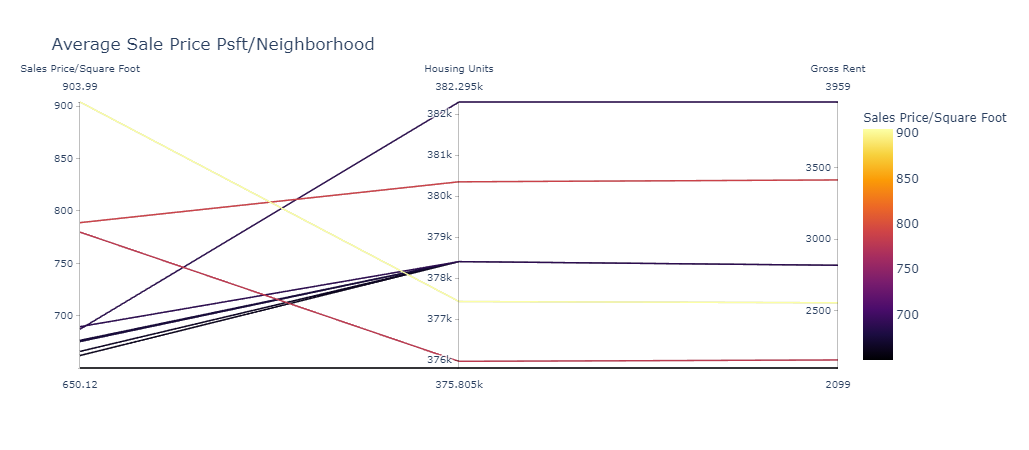

In [65]:
# Answer 6: Parallel Coordinates and Parallel Categories Analysis

# Parallel Coordinates Plot
px.parallel_coordinates(
    top_ten,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average Sale Price Psft/Neighborhood',
    labels={
        'neighborhood': "Neighborhood", 
        'sale_price_sqr_foot':'Sales Price/Square Foot',
        'housing_units':'Housing Units',
        'gross_rent':'Gross Rent',
    },
)

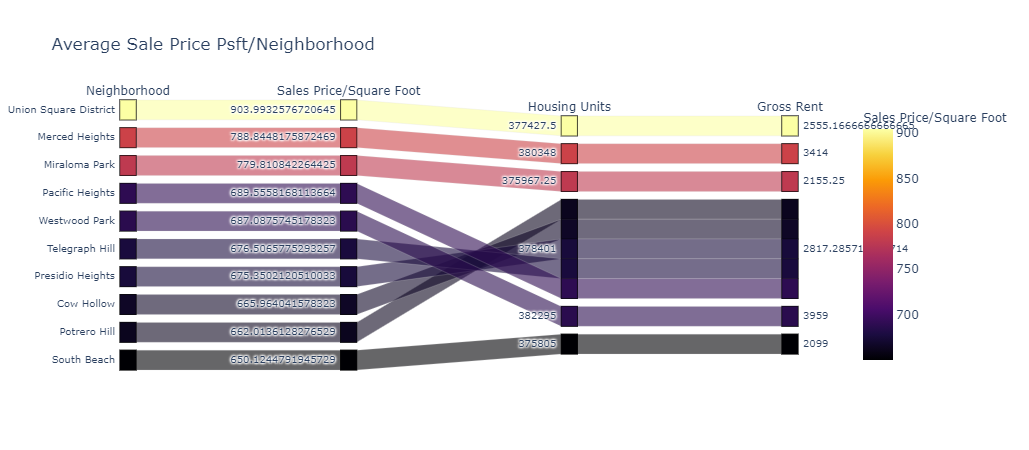

In [66]:
# Parallel Categories Plot
px.parallel_categories(
    top_ten,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average Sale Price Psft/Neighborhood',
    labels={
        'neighborhood': "Neighborhood", 
        'sale_price_sqr_foot':'Sales Price/Square Foot',
        'housing_units':'Housing Units',
        'gross_rent':'Gross Rent',
    },
)

In [67]:
# Answer 7: Neighborhood Map

# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_locations = pd.read_csv(file_path)
neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [68]:
# Calculate the average values for each neighborhood
avg_neighborhood_price = sfo_data.groupby("neighborhood").mean()
avg_neighborhood_price = avg_neighborhood_price.reset_index()
avg_neighborhood_price.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [69]:
# Combined Dataframe with the neighborhood locations
avg_neighborhood_price_locations = pd.concat([neighborhood_locations,avg_neighborhood_price['sale_price_sqr_foot'], avg_neighborhood_price ['housing_units'],
avg_neighborhood_price ['gross_rent']], axis=1).dropna()

avg_neighborhood_price_locations.head()


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


In [ ]:
# Create a scatter mapbox to analyze neighborhood info
map_plot = pl.scatter_mapbox(
    avg_neighborhood_price_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    hover_name="Neighborhood",
    title="Average Sale Price Psft and Average Gross Rent in San Francisco"
)

map_plot.show()

In [70]:
# Scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    avg_neighborhood_price_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    size_max=15,
    zoom=3,
    width=1000,
    hover_name="Neighborhood",
    title="Average Price PSFT and Average Gross Rent in San Francisco",
)

map_plot.show()